In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
true_label = 7
target_label = 7
if not os.path.exists('./attact_{}to{}'.format(true_label, target_label)):
    os.makedirs('./attact_{}to{}'.format(true_label, target_label))

In [3]:
x = np.load('attack_img_{}to{}.npy'.format(true_label, target_label))
x = np.squeeze(x)
fc_para = np.load('paras.npy')
last_layer = np.load('last_layer_{}to{}.npy'.format(true_label, target_label))
last_layer = np.squeeze(last_layer)
prob = np.load('pred_prob_{}to{}.npy'.format(true_label, target_label))
prob = np.squeeze(prob)
pred_label = np.argmax(prob, axis=1)
pred_prob = np.max(prob, axis=1)

In [4]:
print(x.shape)
print(last_layer.shape)
print(pred_label.shape)
print(pred_prob.shape)

(201, 28, 28)
(201, 7, 7, 64)
(201,)
(201,)


In [5]:
salient_map = np.zeros(x.shape)
dim = (x.shape[1], x.shape[2])

for i in range(x.shape[0]):
    salient_img = 0
    for j in range(fc_para.shape[0]):
        salient_img = last_layer[i, :, :, j] * fc_para[j, true_label]
    salient_map[i, :, :] = cv2.resize(salient_img, dim, interpolation = cv2.INTER_LINEAR)
    salient_map[i, :, :] = (salient_map[i, :, :] - np.min(salient_map[i, :, :])) / (np.max(salient_map[i, :, :]) - np.min(salient_map[i, :, :]))
    
salient_map = np.uint8(salient_map * 255)

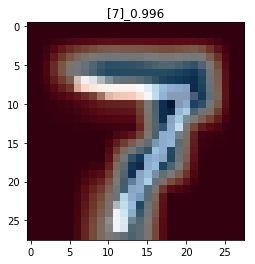

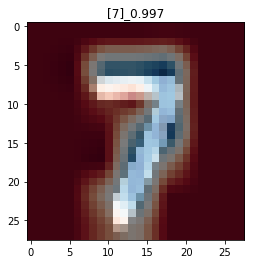

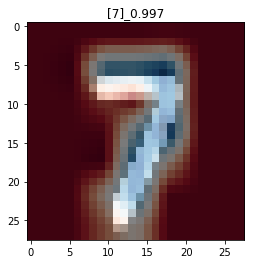

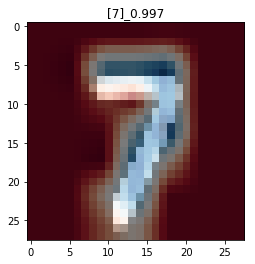

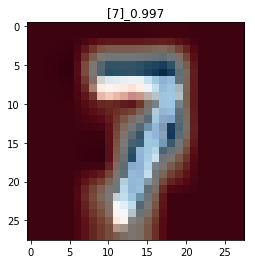

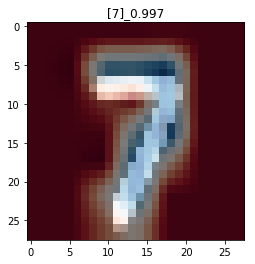

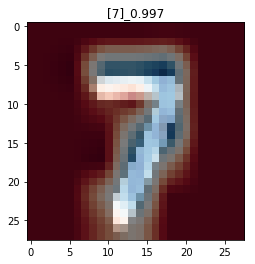

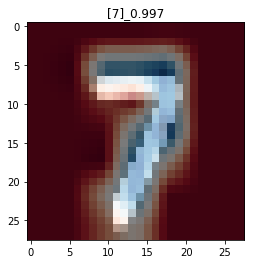

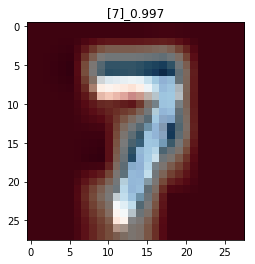

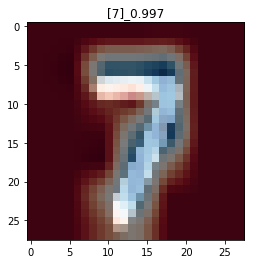

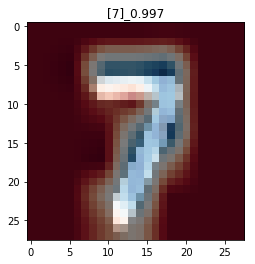

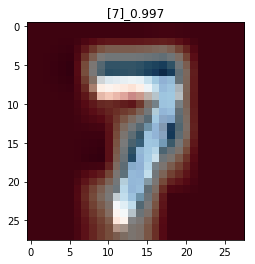

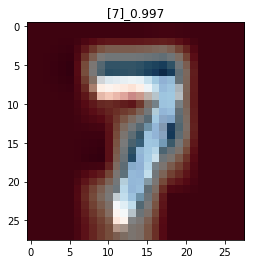

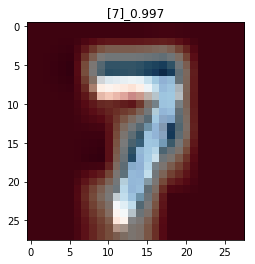

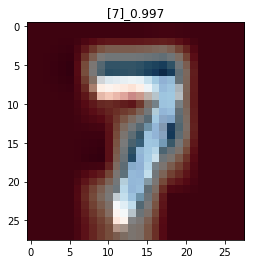

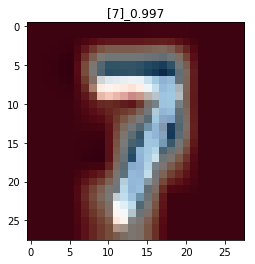

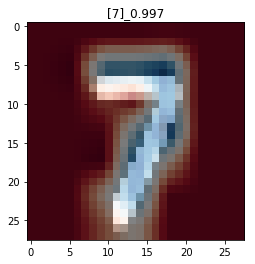

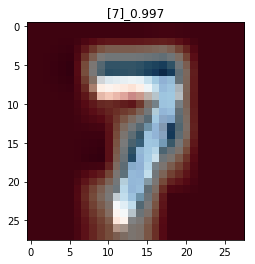

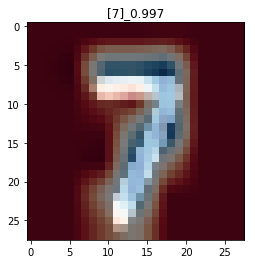

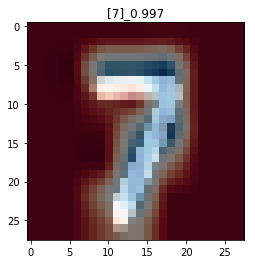

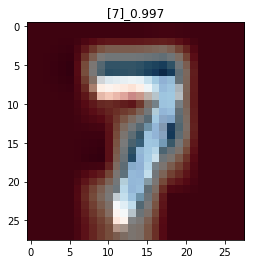

In [6]:
for i in range(0, x.shape[0], 10):
    plt.figure()
    plt.imshow(x[i, :, :], cmap='gray')
    plt.imshow(salient_map[i, :, :], alpha=0.5, cmap='RdBu')
    plt.title('[{}]_{:.3}'.format(pred_label[i], pred_prob[i]))
    plt.savefig('./attact_{}to{}/{}.png'.format(true_label, target_label, str(i)))
    plt.show()

In [7]:
salient_map[0, :, :].min()

0